In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils.DataRetriever import *
from utils.ModelCreator import *
from utils.ResultDisplayer import *

/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/pandas_bridge.py:22: DeprecationWarning: pandas_bridge module will be removed in Elephant v0.8.x
  DeprecationWarning)


In [3]:
import os 
import numpy as np

# Parameters for load data
SUBJECT = "s620" # s605, s616, s617, s619, s620
DATA_FOLDER = f"../../data/{SUBJECT}/" 
IMGS_FOLDER = "../../data/images/"
HEIGHT_ORIG, WIDTH_ORIG = 1080, 1920
HEIGHT, WIDTH = 768, 1024

# Parameters for create labels
TRAIN_IMG_TYPE = "grey" #natural, grey
N_STEPS_AHEAD = 20  #1, 5, 11, 20
TARGET_STEPS_AHEAD = 1

# Parameters to create time series
SEQ_LENGTH = 10

# Parameters for learning
INPUT_UNITS = 30
LEARNING_RATE = 0.0001
EPOCHS = 500
PATIENCE = 15

# Parameters for train model
is_train = True

# Parameters for storing results
is_save = True
is_save_figs = False

# PARAMS NAME
PARAMS_NAME = f"SUBJECT_{SUBJECT}-tIMG_{TRAIN_IMG_TYPE}-N_{N_STEPS_AHEAD}-Nt_{TARGET_STEPS_AHEAD}-SEQ_{SEQ_LENGTH}-InUts_{INPUT_UNITS}-LR_{LEARNING_RATE}-EPOCHS_{EPOCHS}-PAT_{PATIENCE}"

# Folders to store data
RESULTS_FOLDER = "../results/"
CHECKPOINTS_FOLDER = os.path.join("../checkpoints/", PARAMS_NAME)
SAVE_FOLDER = os.path.join(RESULTS_FOLDER, PARAMS_NAME) 
CHECKPOINT_PATH = os.path.join(CHECKPOINTS_FOLDER, "checkpoint")

if not os.path.exists(CHECKPOINTS_FOLDER):
    os.mkdir(CHECKPOINTS_FOLDER)
if not os.path.exists(SAVE_FOLDER):
    os.mkdir(SAVE_FOLDER)

# Img types except the one used for training
IMG_TYPES = ["natural", "white", "black", "grey", "inverted", "pink_noise", "white_noise"]
try:
    IMG_TYPES.pop(np.where(np.array(IMG_TYPES) == TRAIN_IMG_TYPE)[0][0])
except:
    pass

In [8]:
# Img Zooms
SUBJECT_ZOOMS = {
    "s616": {
        "natural": [(2000, 2060), (0,1000)],
        "white": [(35640, 35720), (0,1000)],
        "black": [(2800, 2880), (0,1000)],
        "grey": [(35080, 36120), (0,1000)],
        "inverted": [(36050, 36150), (0,1000)],
        "pink_noise": [(35300, 35450), (0,1000)],
        "white_noise": [(2750, 2820), (0,1000)]
    },
    "s617": {
        "natural": [(2000, 2060), (0,1000)],
        "white": [(35640, 35720), (0,1000)],
        "black": [(2800, 2880), (0,1000)],
        "grey": [(35080, 36120), (0,1000)],
        "inverted": [(36050, 36150), (0,1000)],
        "pink_noise": [(35300, 35450), (0,1000)],
        "white_noise": [(2750, 2820), (0,1000)]
    }
}
try:
    IMG_ZOOMS = SUBJECT_ZOOMS[SUBJECT]
except:
    IMG_ZOOMS = SUBJECT_ZOOMS["s616"]


# Loading Predictions

In [4]:
TRAIN_IMG_TYPE

'grey'

In [5]:
IMG_TYPES

['natural', 'white', 'black', 'inverted', 'pink_noise', 'white_noise']

# Cross-Correlation Analysis

===========> Working on grey images
Cross-Corellation Peak on 5 for x
Cross-Corellation Peak on 0 for y


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and 

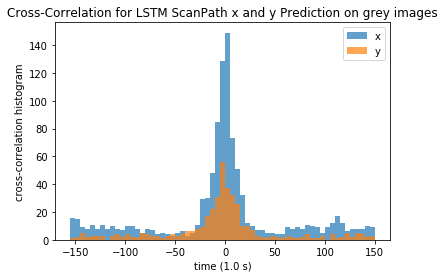

===========> Working on natural images
Cross-Corellation Peak on 25 for x
Cross-Corellation Peak on 20 for y


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/conversion.py:463: UserWarning: Binning discarded 1 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/conversion.py:463: UserWarning: B

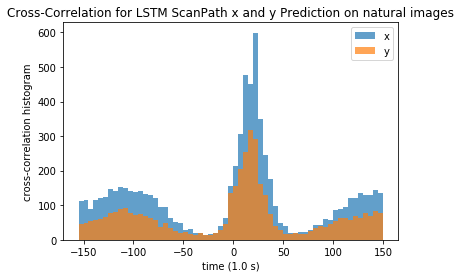

===========> Working on white images
Cross-Corellation Peak on 20 for x
Cross-Corellation Peak on 25 for y


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and 

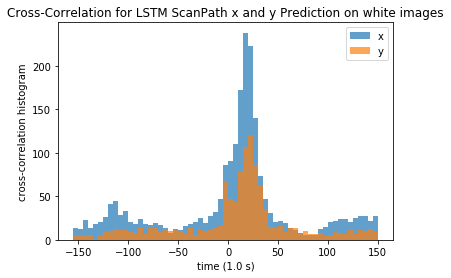

===========> Working on black images
Cross-Corellation Peak on 25 for x
Cross-Corellation Peak on 0 for y


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and 

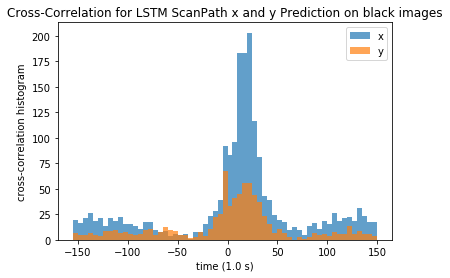

===========> Working on inverted images
Cross-Corellation Peak on 25 for x
Cross-Corellation Peak on 20 for y


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and 

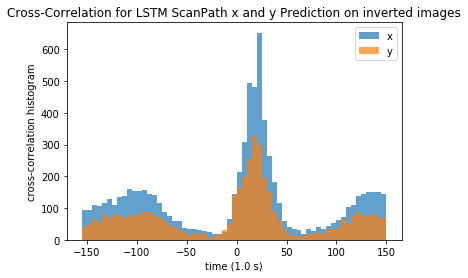

===========> Working on pink_noise images
Cross-Corellation Peak on 25 for x
Cross-Corellation Peak on 25 for y


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and 

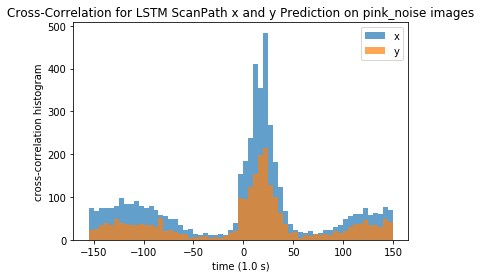

===========> Working on white_noise images
Cross-Corellation Peak on 25 for x


/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and np.issubdtype(type(window[0]), int) \
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:682: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  and np.issubdtype(type(window[1]), int):
/home/camilojd/Environments/scanpaths-gpu/lib/python3.7/site-packages/elephant/spike_train_correlation.py:681: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if len(window) == 2 and 

Cross-Corellation Peak on 20 for y


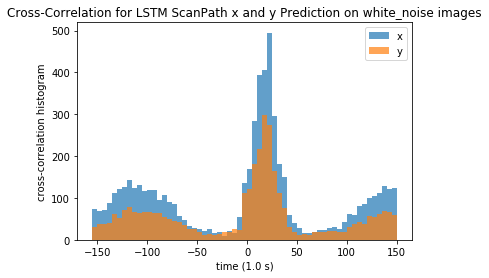

In [6]:
for load_img in [TRAIN_IMG_TYPE] + IMG_TYPES:
    y_real, y_pred = load_npz(SAVE_FOLDER, load_img)
    for x_or_y in ["x", "y"]:
        cc_hist, peak = get_cross_correlation_histogram(y_real[x_or_y].values, y_pred[x_or_y].values)
        print(f"Cross-Corellation Peak on {peak} for {x_or_y}")
        plot_cross_correlation_histogram(cc_hist, x_or_y=x_or_y, img_type=load_img, x_lim=None)
    plt.legend()
    plt.show()

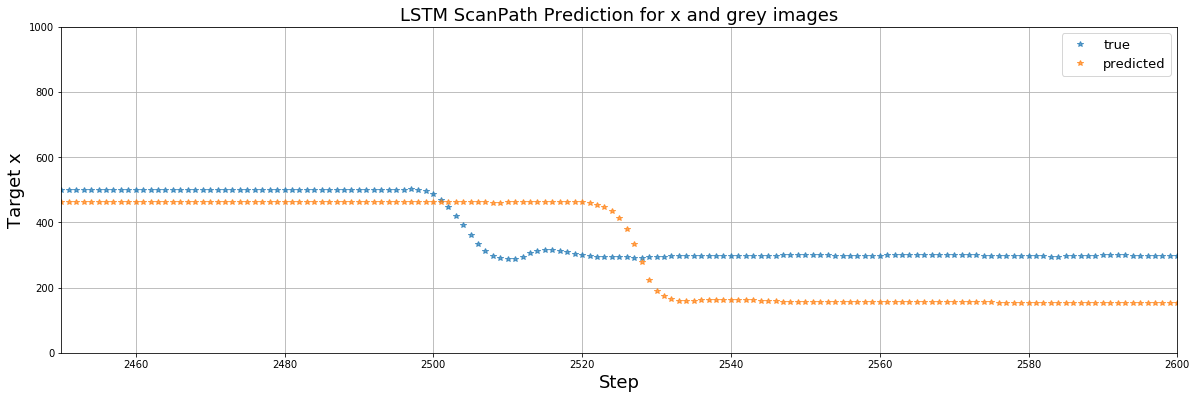

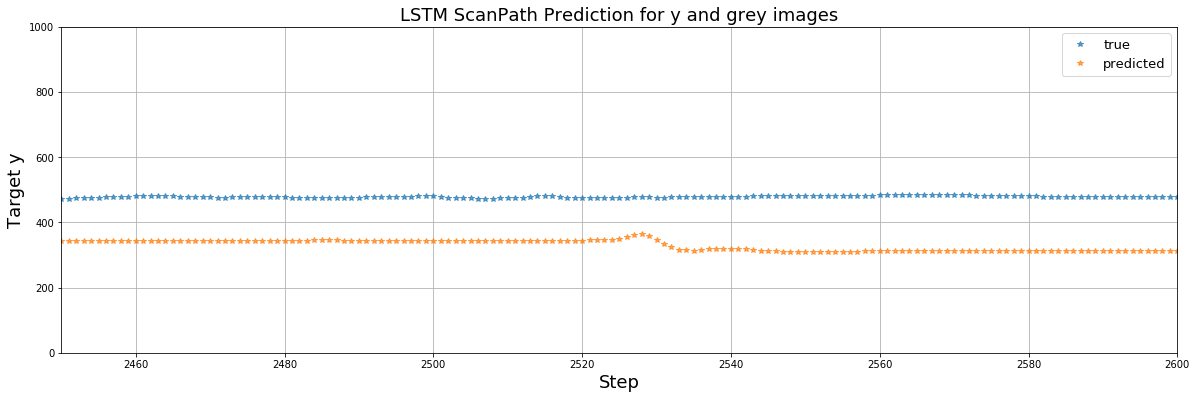

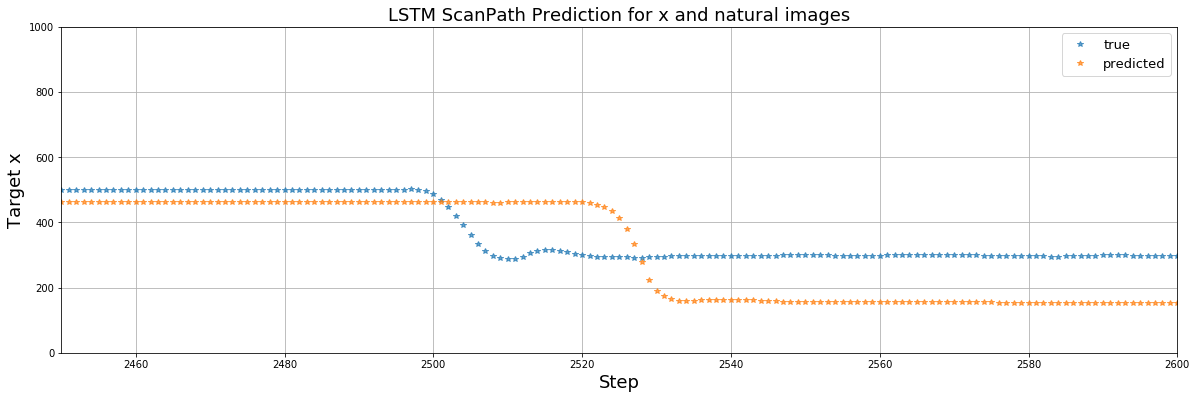

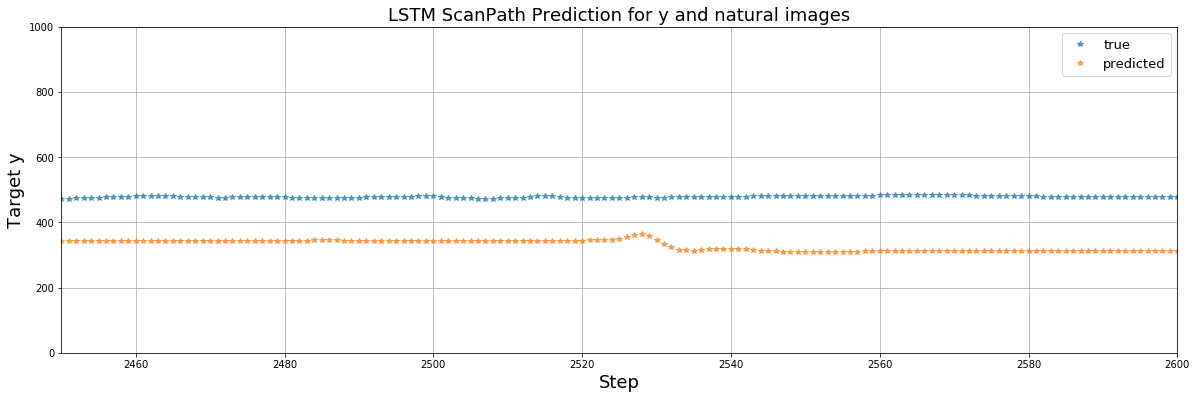

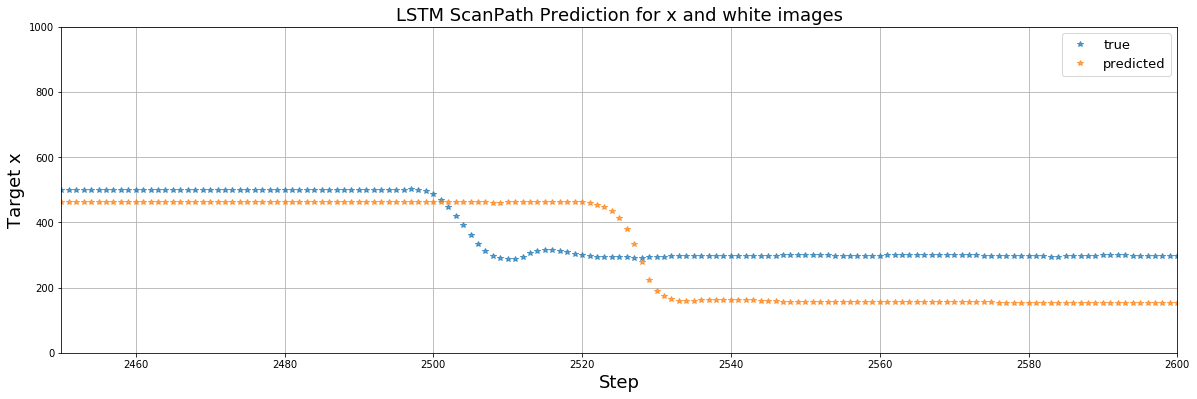

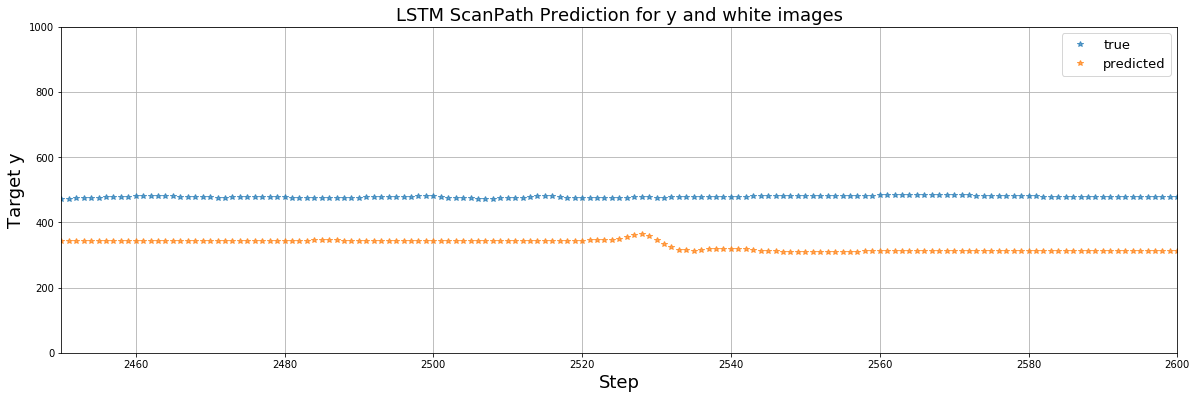

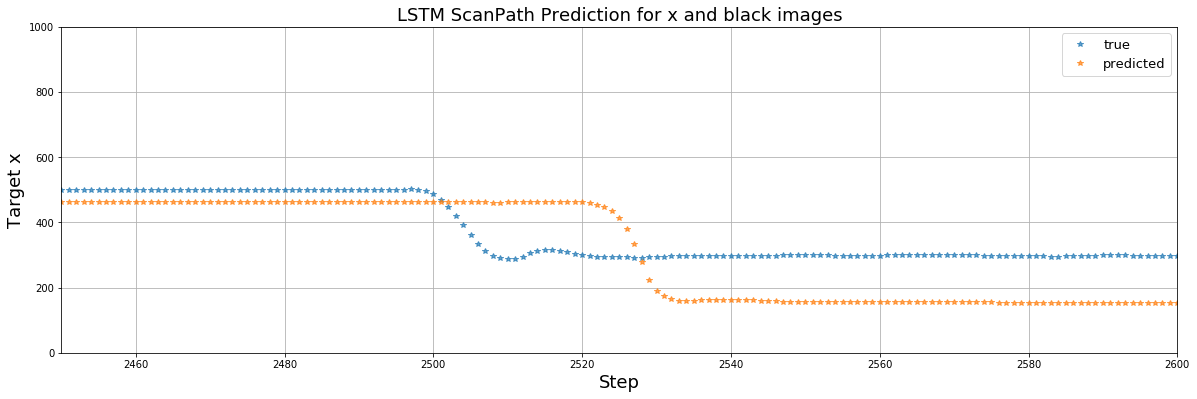

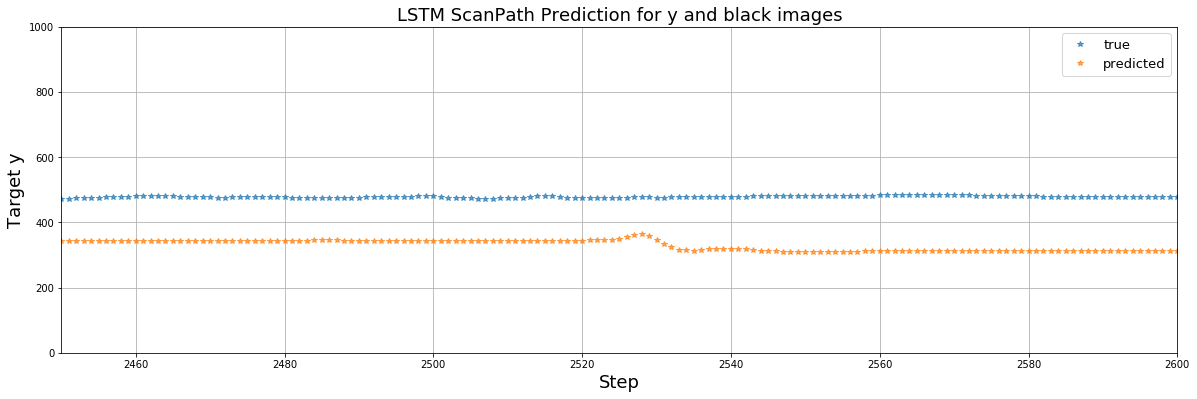

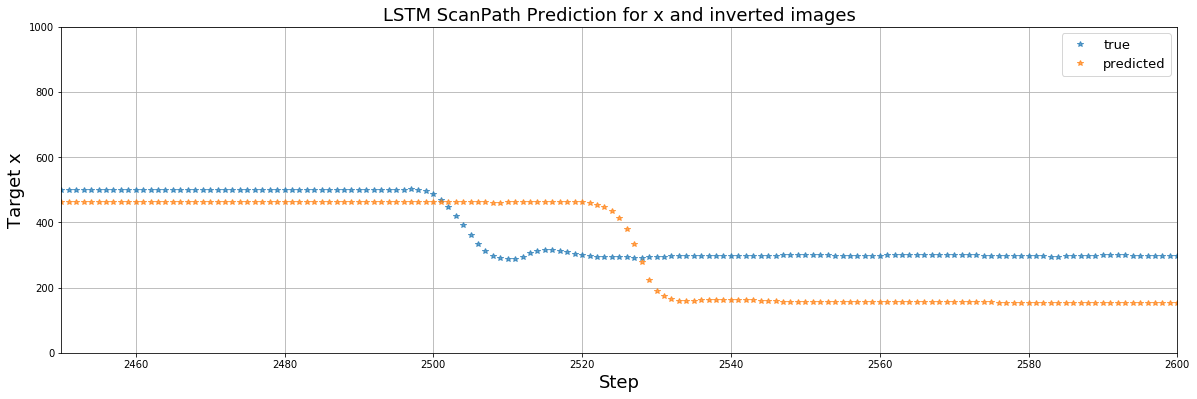

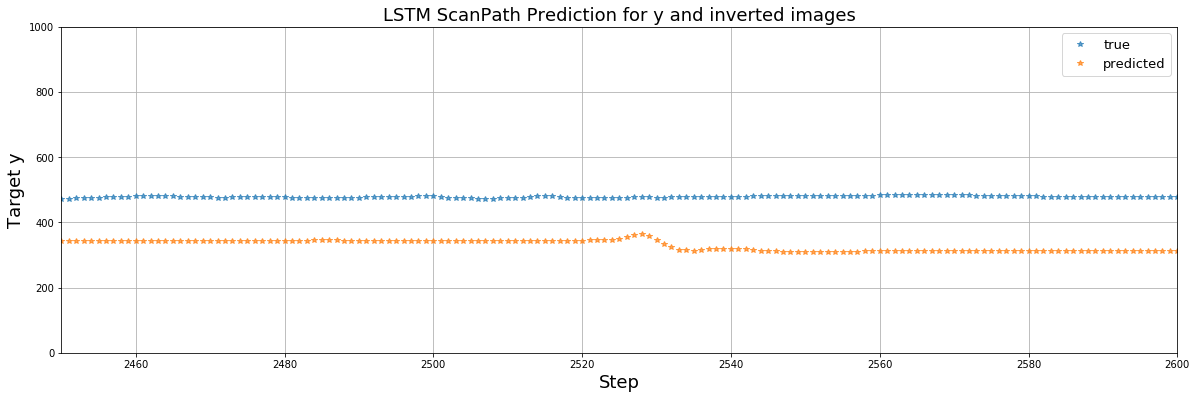

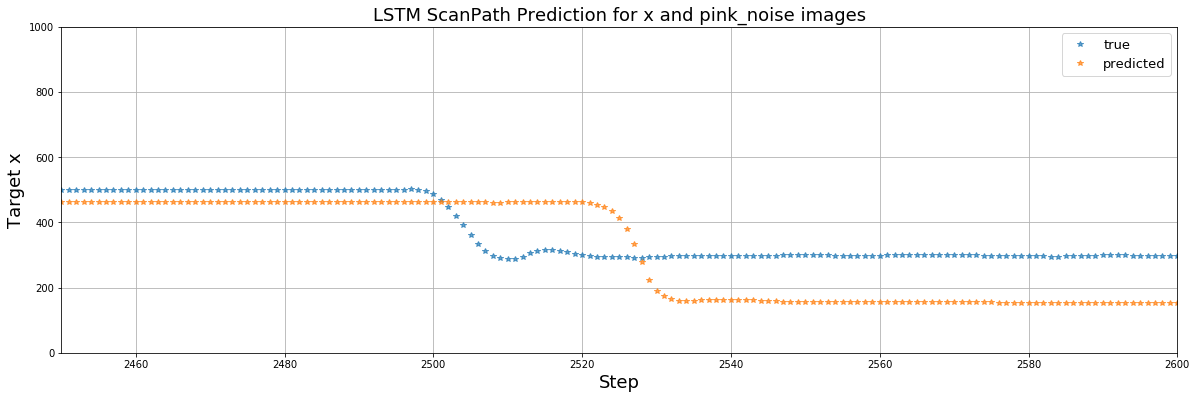

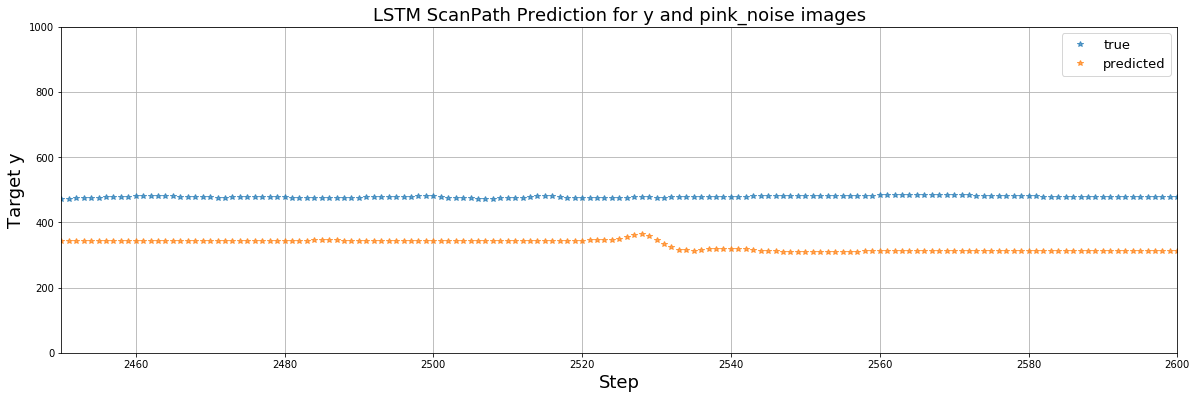

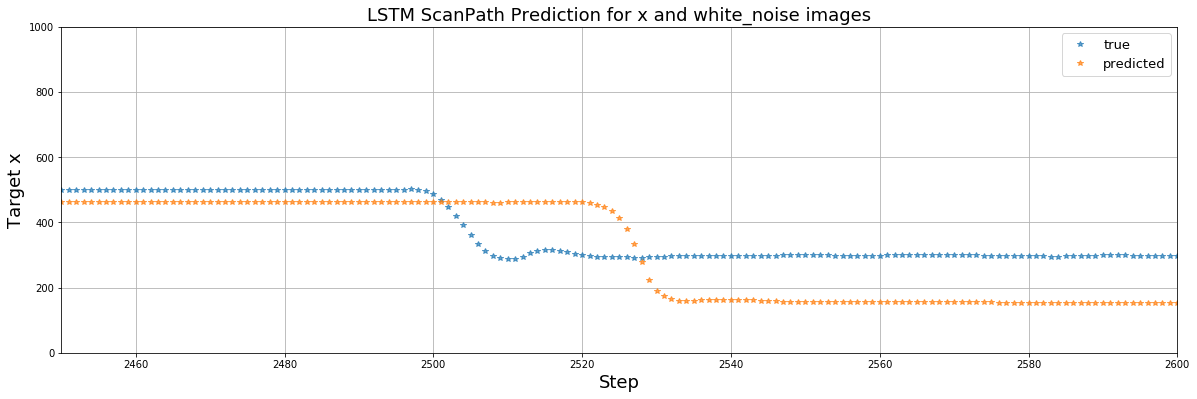

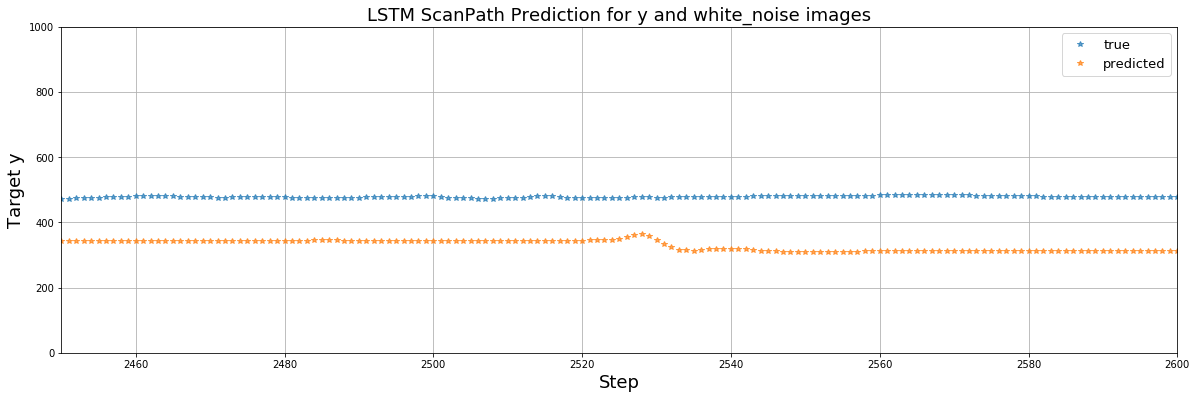

In [9]:
for load_img in [TRAIN_IMG_TYPE] + IMG_TYPES:
    x_lim = (2450, 2600)
    y_lim = IMG_ZOOMS[load_img][1]
    plot_prediction(y_real, y_pred, load_img, SAVE_FOLDER, x_lim=x_lim, y_lim=y_lim)